In [262]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt



In [263]:
# 1. Data

data = {
    'housesize': [1200, 1500, 1800, 2000, 2200],
    'houseprice': [270000, 310000, 330000, 420000, 470000]
}

df = pd.DataFrame(data)
X = df[['housesize']]  # Features
y = df['houseprice']

In [264]:



df['houseprice'].sort_values()

,houseprice
0,270000
1,310000
2,330000
3,420000
4,470000


In [265]:
df

,housesize,houseprice
0,1200,270000
1,1500,310000
2,1800,330000
3,2000,420000
4,2200,470000


In [266]:
# 2. Initial prediction (mean)
initial_pred = np.mean(y)
print("Initial Prediction (Mean):", initial_pred)

df["Pred1"] = initial_pred

Initial Prediction (Mean): 360000.0


In [267]:
df

,housesize,houseprice,Pred1
0,1200,270000,360000.0
1,1500,310000,360000.0
2,1800,330000,360000.0
3,2000,420000,360000.0
4,2200,470000,360000.0


In [268]:
#Residual1

residual_1 = y - initial_pred
df['residual_1'] = residual_1

In [269]:
df

,housesize,houseprice,Pred1,residual_1
0,1200,270000,360000.0,-90000.0
1,1500,310000,360000.0,-50000.0
2,1800,330000,360000.0,-30000.0
3,2000,420000,360000.0,60000.0
4,2200,470000,360000.0,110000.0


In [270]:
#similarity score for residual_1



In [271]:

# 3. Step 1: Train first XGBoost tree on residuals
dtrain_1 = xgb.DMatrix(X, label=residual_1)

params = {
    "objective": "reg:squarederror",
    "max_depth": 1,  # Decision stump
    "eta": 1,
    "lambda": 0,
    "gamma": 0
}

bst1 = xgb.train(params, dtrain_1, num_boost_round=1)


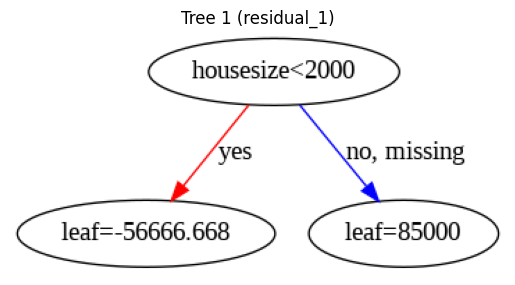

In [272]:
# . Optional: Visualize trees
xgb.plot_tree(bst1, num_trees=0)
plt.title("Tree 1 (residual_1)")
plt.show()

In [273]:
bst1.dump_model('model.txt')


In [274]:
# Predict residuals from Tree 1
pred_2 = bst1.predict(xgb.DMatrix(X))
Updated_Model2_pred = initial_pred + pred_2


In [275]:
df["pred_2"] = pred_2
df["Updated_Model2_pred"] = Updated_Model2_pred


In [276]:
df

,housesize,houseprice,Pred1,residual_1,pred_2,Updated_Model2_pred
0,1200,270000,360000.0,-90000.0,-56666.667969,303333.332031
1,1500,310000,360000.0,-50000.0,-56666.667969,303333.332031
2,1800,330000,360000.0,-30000.0,-56666.667969,303333.332031
3,2000,420000,360000.0,60000.0,85000.000000,445000.000000
4,2200,470000,360000.0,110000.0,85000.000000,445000.000000


# Calculate Residuals of Model 2

In [277]:
residual_2 = y - Updated_Model2_pred

In [278]:
df['residual_2'] = residual_2

In [279]:
df

,housesize,houseprice,Pred1,residual_1,pred_2,Updated_Model2_pred,residual_2
0,1200,270000,360000.0,-90000.0,-56666.667969,303333.332031,-33333.332031
1,1500,310000,360000.0,-50000.0,-56666.667969,303333.332031,6666.667969
2,1800,330000,360000.0,-30000.0,-56666.667969,303333.332031,26666.667969
3,2000,420000,360000.0,60000.0,85000.000000,445000.000000,-25000.000000
4,2200,470000,360000.0,110000.0,85000.000000,445000.000000,25000.000000


In [280]:
# 4. Step 2: Train second tree on new residuals

dtrain_2 = xgb.DMatrix(X, label=residual_2)

bst2 = xgb.train(params, dtrain_2, num_boost_round=1)
pred_3 = bst2.predict(xgb.DMatrix(X))
final_pred = Updated_Model2_pred + pred_3



In [281]:
df['pred_3'] = pred_3


#Final Prediction

In [282]:
df['final_pred'] = df['Pred1'] + df['pred_2'] +df['pred_3']

In [283]:
df

,housesize,houseprice,Pred1,residual_1,pred_2,Updated_Model2_pred,residual_2,pred_3,final_pred
0,1200,270000,360000.0,-90000.0,-56666.667969,303333.332031,-33333.332031,-33333.332031,270000.000000
1,1500,310000,360000.0,-50000.0,-56666.667969,303333.332031,6666.667969,8333.334961,311666.666992
2,1800,330000,360000.0,-30000.0,-56666.667969,303333.332031,26666.667969,8333.334961,311666.666992
3,2000,420000,360000.0,60000.0,85000.000000,445000.000000,-25000.000000,8333.334961,453333.334961
4,2200,470000,360000.0,110000.0,85000.000000,445000.000000,25000.000000,8333.334961,453333.334961


In [284]:
# 5. Final predictions and visualization
print("\nFinal Predictions:", np.round(final_pred, 2))
print("Actual Values     :", y)


Final Predictions: [270000.   311666.67 311666.67 453333.33 453333.33]
Actual Values     : 0    270000
1    310000
2    330000
3    420000
4    470000
Name: houseprice, dtype: int64


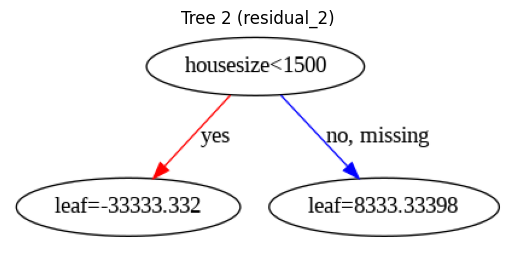

In [285]:
xgb.plot_tree(bst2, num_trees=0)
plt.title("Tree 2 (residual_2)")
plt.show()